<a href="https://colab.research.google.com/github/Christelleelkhoury/AAI614_-ElKhoury-/blob/main/Week%203/Notebook3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 3.2: Practice with Data Cleaning*


In [1]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Exercise I. Load the following datafile from GitHub

In [2]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")

In [3]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


In [24]:
#grads['Salary'] = grads['Salary'].apply(lambda x: x.replace('$', '').replace('k', '000')).astype(int)

Question 1: Identify all the outliers in the above data.  Justify your answers using objective measures.

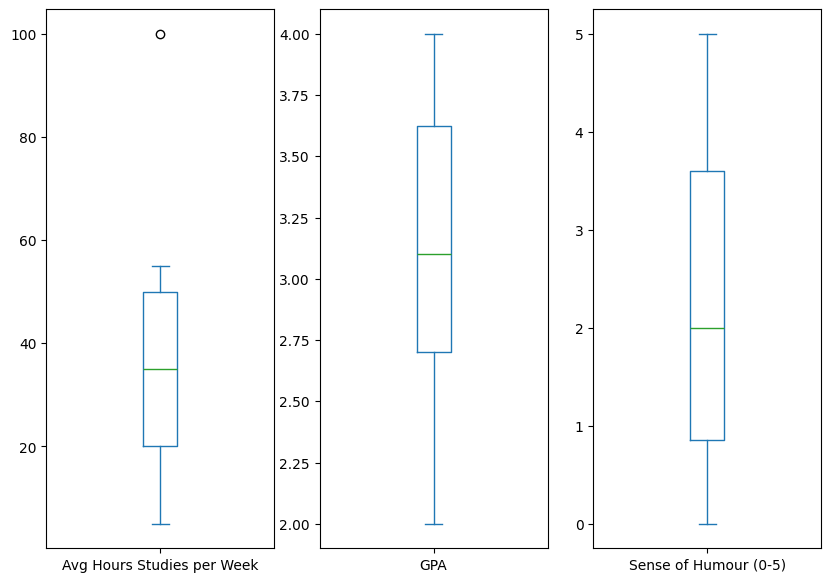

In [4]:
import matplotlib.pyplot as plt

grads.plot(kind = 'box', subplots = True, figsize = (10, 7))
plt.show()

In [7]:

# finding the 1st quartile
q1 = grads['Avg Hours Studies per Week'].quantile(0.25)

# finding the 3rd quartile
q3 = grads['Avg Hours Studies per Week'].quantile(0.75)
med = np.median(arr1)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

NameError: name 'np' is not defined

In [5]:
# Function to detect numerical outliers
def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return column[(column < lower_bound) | (column > upper_bound)]

# Numerical columns
outliers_hours_studies = detect_outliers(grads["Avg Hours Studies per Week"])

print('The following are the outliers in the boxplot:{}'.format(outliers_hours_studies))

The following are the outliers in the boxplot:6    100
Name: Avg Hours Studies per Week, dtype: int64


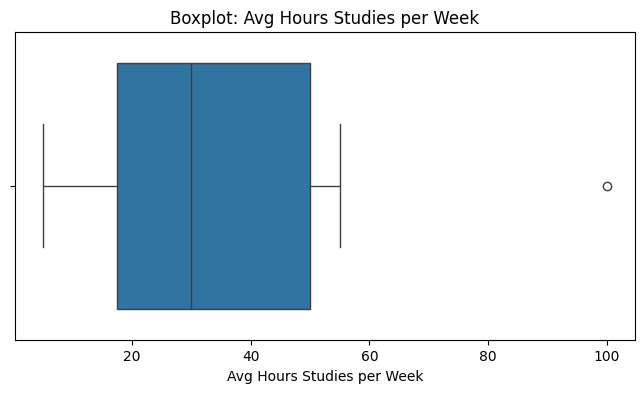

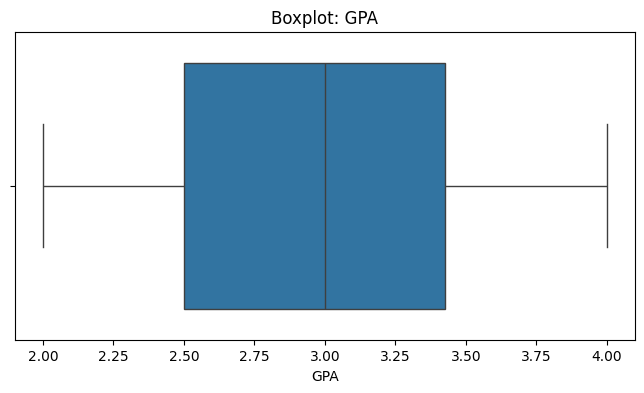

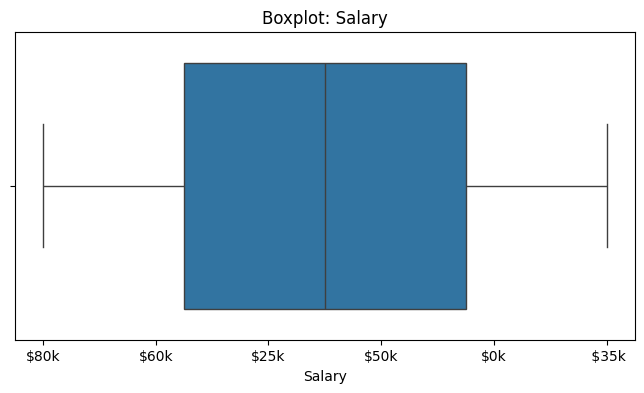

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Avg Hours Studies per Week
plt.figure(figsize=(8, 4))
sns.boxplot(x=grads["Avg Hours Studies per Week"])
plt.title("Boxplot: Avg Hours Studies per Week")
plt.show()

# Boxplot for GPA
plt.figure(figsize=(8, 4))
sns.boxplot(x=grads["GPA"])
plt.title("Boxplot: GPA")
plt.show()

# Boxplot for Salary
plt.figure(figsize=(8, 4))
sns.boxplot(x=grads["Salary"])
plt.title("Boxplot: Salary")
plt.show()


Question 2: There are various data that are missing.  Fill-in the missing data or delete the rows/columns that you think you should delete.  Justify your answer

Question 3: Reload the data and fill-in the data using mean method as well as the frequent method.

Exercise II. Run the cell below to create a new dataframe called `df_miss`.  Its first column will contain some missing values.

In [ ]:
import pandas as pd
import numpy as np
import random

nrows = 10
ncols = 5

# set a seed for random number generation
np.random.seed(314)
# create an array filled with random data
data = np.array(np.random.rand(nrows, ncols))
# put the data to a pandas dataframe
df_miss = pd.DataFrame(data)
# rename the columns
df_miss.columns = ['col_'+str(ii) for ii in range(ncols)]

# randomly set some values to missing
ix0 = np.random.randint(nrows, size=3)
ix1 = np.random.randint(nrows, size=3)

df_miss['col_0'][ix0] = np.nan
df_miss['col_1'][ix1] = np.nan

print(df_miss)

Impute the missing values (NaN) in `col_0` (but not `col_1`) with the median.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

Impute the missing values in `col_1` with value 0.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.